[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/anwala/teaching-web-science/blob/main/fall-2022/week-3/data_440_f22_mod_03_info_vis_r.ipynb)

# DATA 440 - Module 03 - InfoVis R Tutorial

These commands can also be run locally using RStudio.

There are a ton of references available for R and since it's popular, you can pretty much search for whatever you want and find something close.

## R Basics

Using R as a calculator:

In [ ]:
1 / 200 * 30
(59 + 73 + 2) / 3
sin(pi/2)

**Important:** Variable assignment is done with `<-`, not with `=`

In [ ]:
x <- 3*4
x

Vectors are important in R.  Access is similar to Python notation for lists (but must include both ends of the range).

In [ ]:
b1<-c(1,2,3,4,5,6)
b1

In [ ]:
b2<-1:10
b2
b2[4]
b2[0:4]
b2[4:6]

In [ ]:
b2[:4]

## Working with Data

`read.csv()`
 * reads data as table and converts it to data frame
 * can read local file or file on the web
 * specify separator with `sep=`
 * specify if there's column titles with `header`

In [1]:
mydata1 <- read.csv("https://raw.githubusercontent.com/anwala/teaching-web-science/main/fall-2022/week-3/table_minus_header.tsv", sep="\t", header=F)
mydata1

V1,V2,V3
<int>,<int>,<int>
1,10,20
2,12,22
4,14,24
8,18,28
10,20,30


You can also read in a datafile that has column names (use `header=T`). Columns are then addressable by `var$colname`.

In [2]:
mydata2<-read.table("https://raw.githubusercontent.com/anwala/teaching-web-science/main/fall-2022/week-3/table_plus_header.tsv",sep="\t",header=T)
mydata2

id,val_A,val_B
<int>,<int>,<int>
1,10,20
2,12,22
4,14,24
8,18,28
10,20,30


Accessing columns -- using names or using column number

`var[row,col]`

In [11]:
mydata2$id
mydata2$val_A
mydata2$val_B
mydata2[3,2]

[1]  1  2  4  8 10

[1] 10 12 14 18 20

[1] 20 22 24 28 30

[1] 14

Accessing an individual cell (row 3 in column val_A) -- two different ways

In [7]:
mydata2$val_A[3]
mydata2[3,2]

[1] 14

[1] 14

Accessing a row (row 3)

In [ ]:
mydata2[3,]

What if you have missing data and want to perform some mathematical functions?  

Use `NA` in place of the missing data and use `na.rm=T` options in functions.

In [12]:
d1<-c(1:3,rep(NA,4),8:10)
d1

[1]  1  2  3 NA NA NA NA  8  9 10

In [13]:
mean(d1)

[1] NA

In [14]:
mean(d1,na.rm=T)
median(d1,na.rm=T)

[1] 5.5

[1] 5.5

## Plotting with ggplot2

First we load the ggplot2 library. 

Then we're going to use some of the datasets included with the ggplot2 library.  You can see the list of these with the `data(package="ggplot2")` command. For each dataset, use `?datasetName` to get more information about the dataset.

In [15]:
library(ggplot2)
theme_set(theme_bw())  # selects a black and white theme
library(scales)        # allows us to format axes labels with commas
options(scipen=999)    # prevent using scientific notation

In [16]:
data(package="ggplot2")

In [17]:
?midwest

In [19]:
data("midwest", package = "ggplot2")

In [33]:
head(midwest, 6)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


### Scatterplot

Here's a basic scatterplot, showing the percentage of college educated (mapped to the y-axis) vs. the total population (mapped to the x-axis) in each county in Ohio (state==OH).

Notice the notation used to subset the dataset inside the `ggplot()` function.  `midwest$state` refers to the `state` column in the midwest dataset.

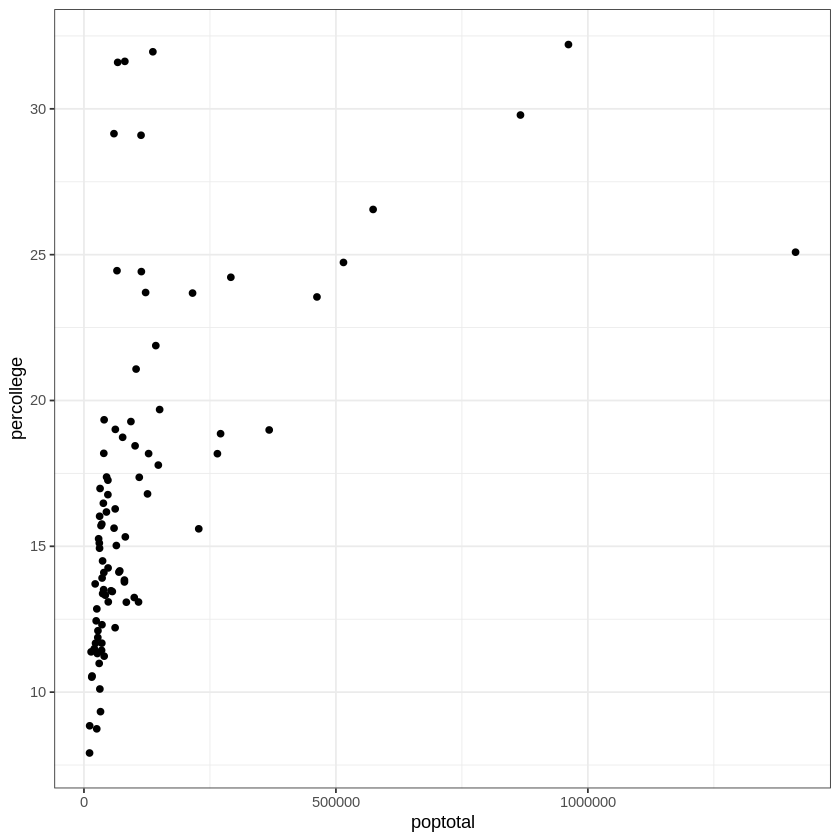

In [28]:
gg <- ggplot(midwest[midwest$state=="OH",], aes(x=poptotal, y=percollege)) + 
  geom_point()
plot(gg)

Because we saved the basic chart in a variable, we can reuse it and add options.  We add `scale_x_continuous(label=comma)` so that the numbers are comma-formatted and specify the chart labels.

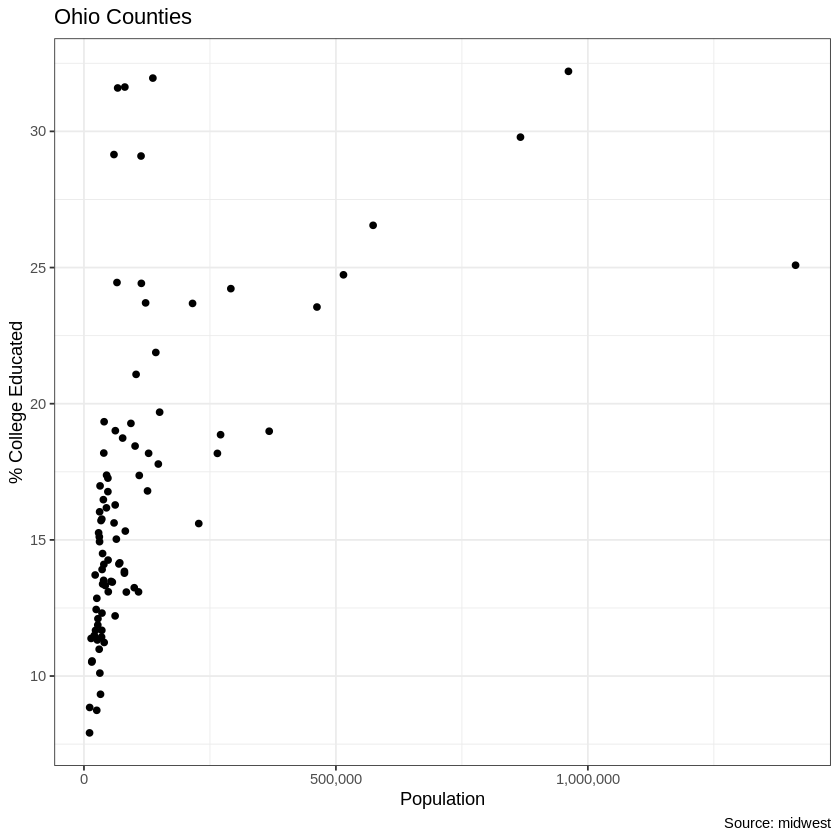

In [29]:
gg + 
  scale_x_continuous(label=comma) + 
  labs(y="% College Educated", 
       x="Population", 
       title = "Ohio Counties",
       caption="Source: midwest")

### Bar Chart

For our bar chart, let's look at the total population in each state.  We can sum `poptotal` in each county.

In [30]:
state_pop <- aggregate(midwest$poptotal, by=list(midwest$state), FUN=sum)
state_pop

Group.1,x
<chr>,<int>
IL,11430602
IN,5544159
MI,9295297
OH,10847115
WI,4891769


Then we'll change the column labels to something reasonable.

In [35]:
colnames(state_pop) <- c("state", "poptotal") 
state_pop

state,poptotal
<chr>,<int>
IL,11430602
IN,5544159
MI,9295297
OH,10847115
WI,4891769


We use `geom_bar()` to create a bar chart.  We want the chart to directly show the values in the table, so we use `stat="identity"`.  

We can also specify the width of the bars and also the color for all the bars. Note that this is not mapping an attribute to color, but coloring all bars regardless of value, since it's outside of the `aes()` function.

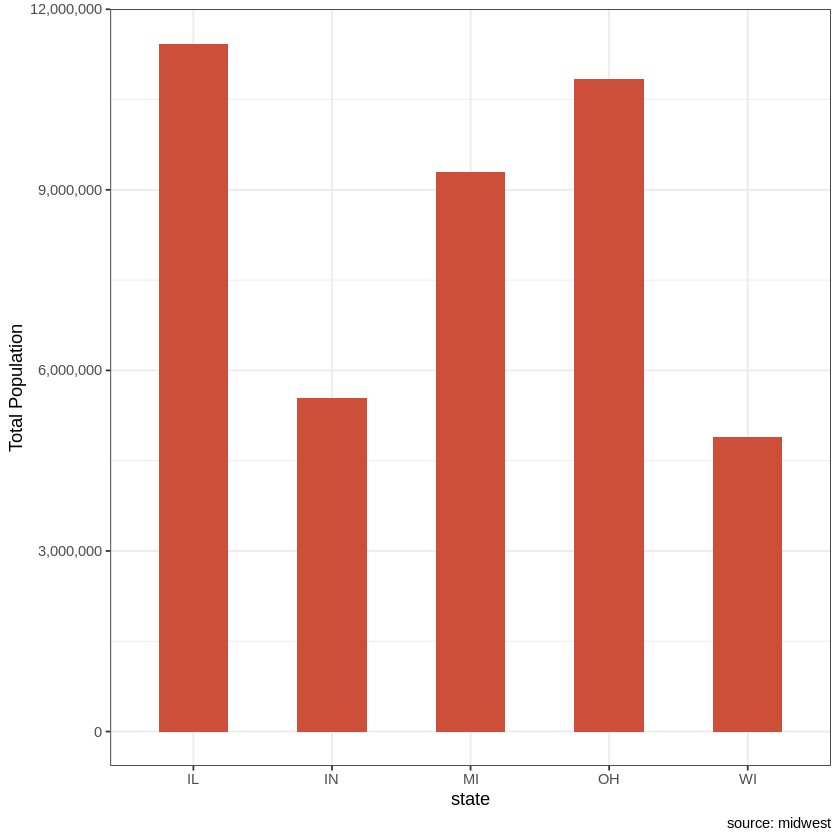

In [36]:
ggplot(state_pop, aes(x=state, y=poptotal)) + 
  geom_bar(stat="identity", width=.5, fill="tomato3") + 
  scale_y_continuous(label=comma) + 
  labs(y="Total Population", caption="source: midwest")

Next, let's sort this by population in descending order.

In [37]:
ordered <- state_pop[order(-state_pop$poptotal),]
ordered$state <- factor(ordered$state, levels = ordered$state)  # to retain the order in plot
ordered

,state,poptotal
,<fct>,<int>
1,IL,11430602
4,OH,10847115
3,MI,9295297
2,IN,5544159
5,WI,4891769


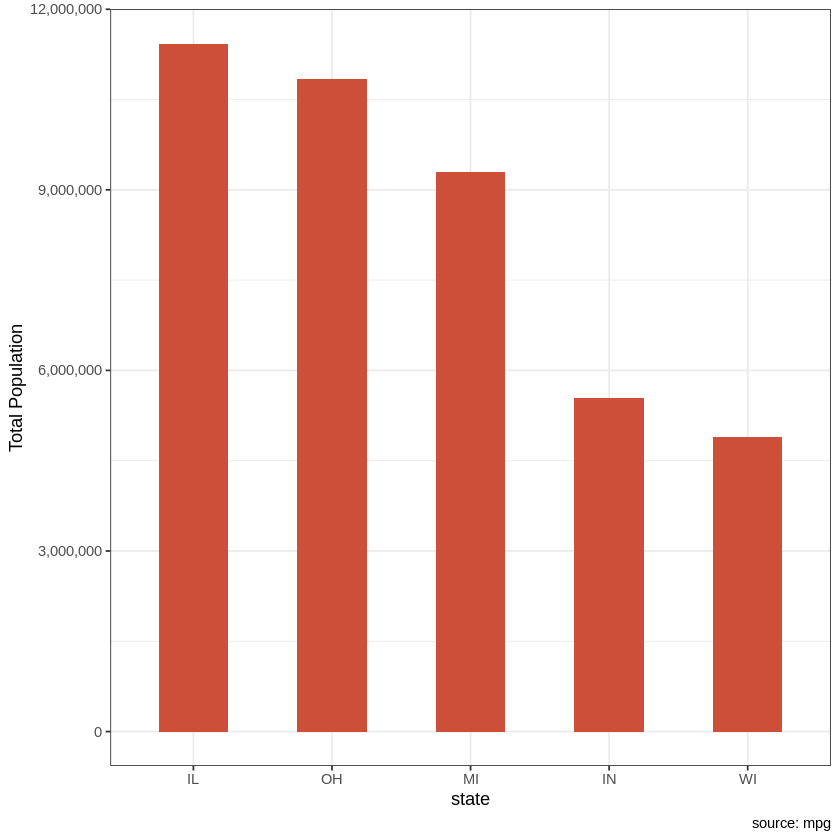

In [38]:
ggplot(ordered, aes(x=state, y=poptotal)) + 
  geom_bar(stat="identity", width=.5, fill="tomato3") + 
  scale_y_continuous(label=comma) + 
  labs(y="Total Population", caption="source: mpg")

And then turn it sideways for a horizontal bar chart by just switching the x and y axes.

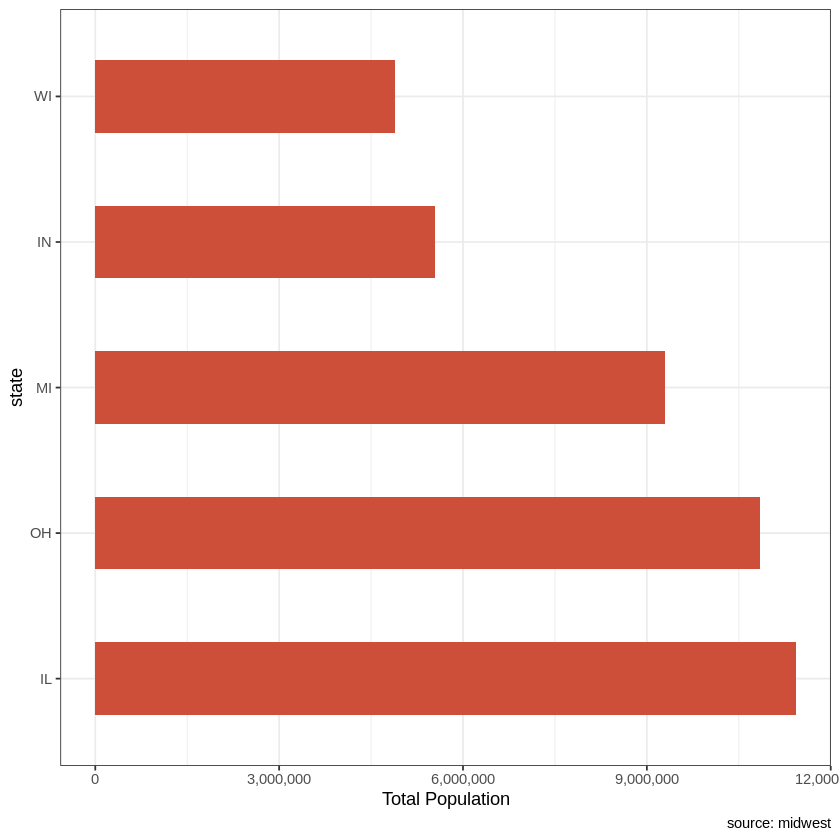

In [39]:
ggplot(ordered, aes(y=state, x=poptotal)) + 
  geom_bar(stat="identity", width=.5, fill="tomato3") + 
  scale_x_continuous(label=comma) + 
  labs(x="Total Population", caption="source: midwest")

### Line Chart

For a line chart, we need an ordered (but not necessarily quantitative) value for the x-axis.  Usually this is something like time.  So we need to load a different dataset.  The economics dataset is a time series dataset with various economic indicators from 1967-2015.

In [40]:
?economics

In [41]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


We use `geom_line()` to create the line chart.

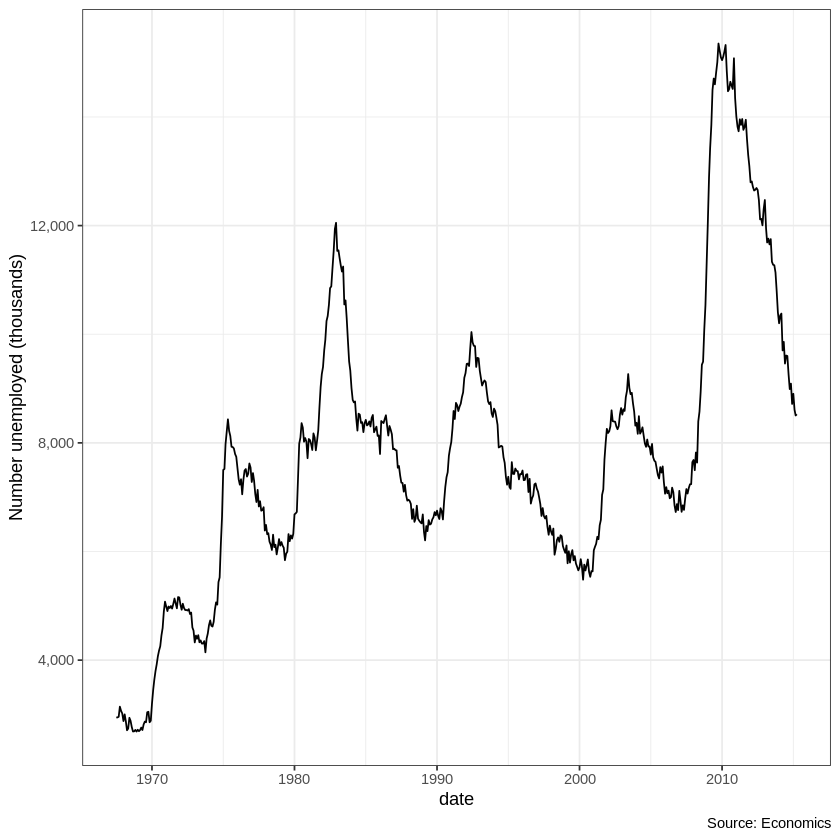

In [42]:
gg <- ggplot(economics, aes(x=date)) + 
  geom_line(aes(y=unemploy)) + 
  scale_y_continuous(label=comma) + 
  labs(y="Number unemployed (thousands)",
    caption="Source: Economics")
plot(gg)

We can add points to the line chart just by adding a `geom_point()`.

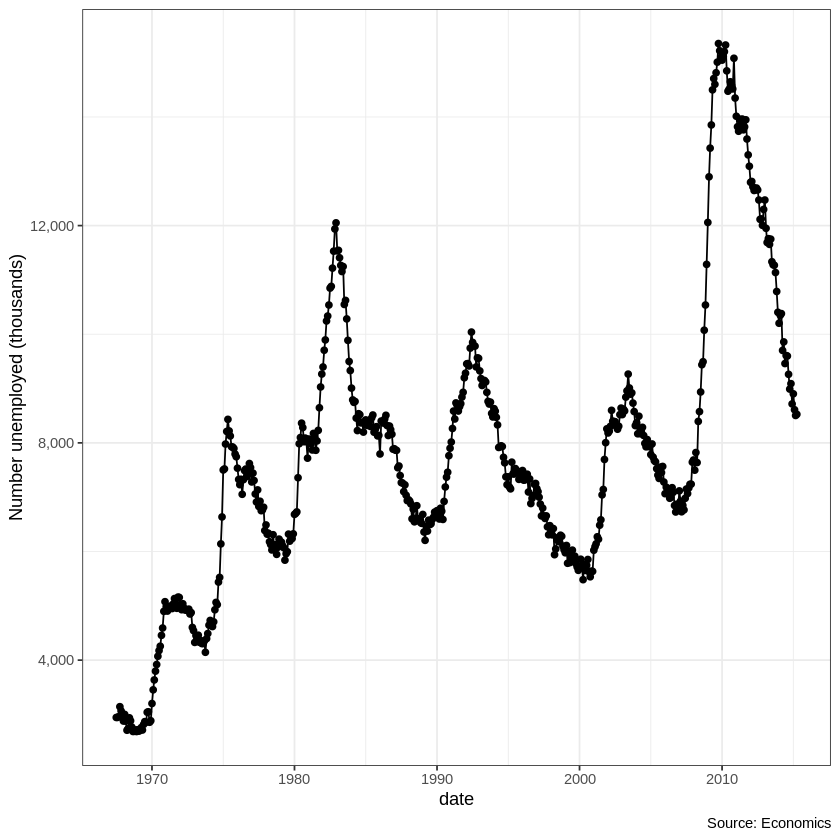

In [43]:
gg + geom_point(aes(y=unemploy))

### Scatterplot Matrix

The simplest way to plot a scatterplot matrix is with the standard R function `pairs()` (not a part of ggplot2).  Instead of plotting the data in the diagonals, it lists the attribute name.

The example here goes back to the midwest dataset, selects only columns 4:6, and sets the point mark to a filled dot (19).

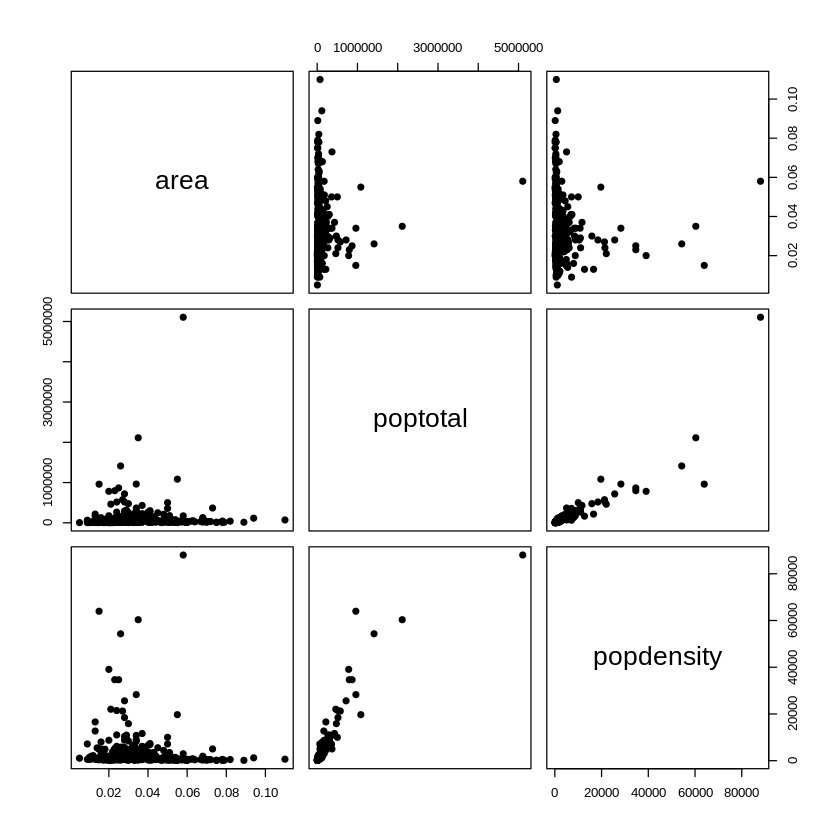

In [44]:
pairs(midwest[,4:6], pch=19)

### Histogram

For the histogram, we show the distribution of population per county.  Note that we're limiting this to counties that have less than 1 M people (in particular, Cook County, IL includes Chicago and has > 5 M people), so that skews the histogram.

To create the histogram, we use the `geom_histogram()` function.  `binwidth` sets the size of each histogram bin (this one is set to 10,000).

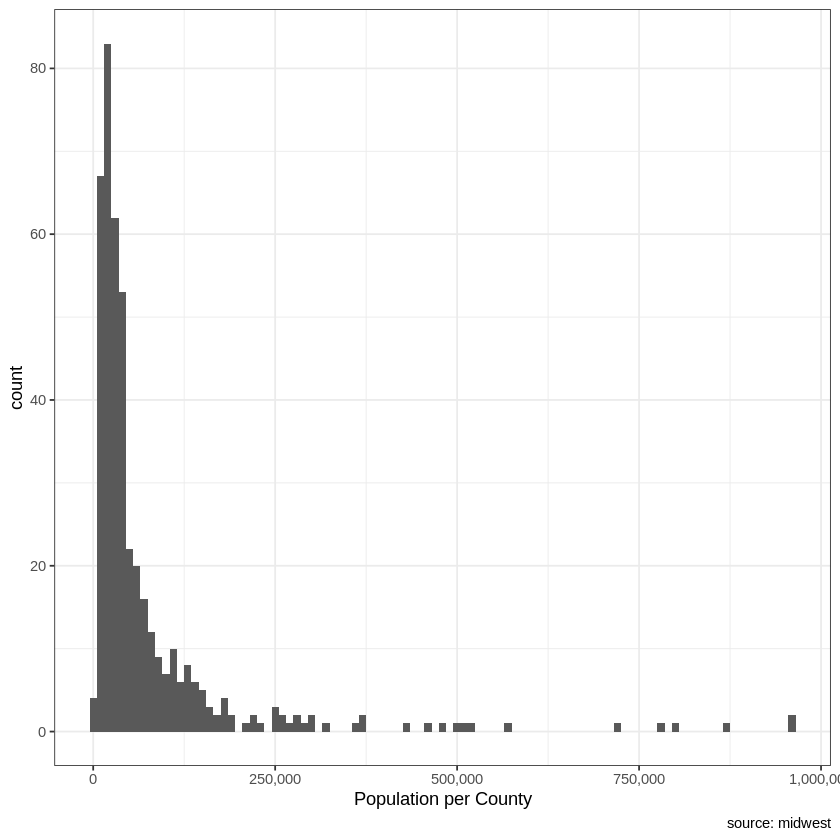

In [45]:
ggplot(midwest[midwest$poptotal < 1000000,], aes(poptotal)) + 
  geom_histogram(binwidth=10000) +
  scale_x_continuous(label=comma) +
  labs(x = "Population per County", caption="source: midwest")

### Boxplot

We're again looking at the total population by county in the midwest (and again, only for counties with < 1M people).  This time, we'll use boxplots (`geom_boxplot()`) and create a separate boxplot for each state.  

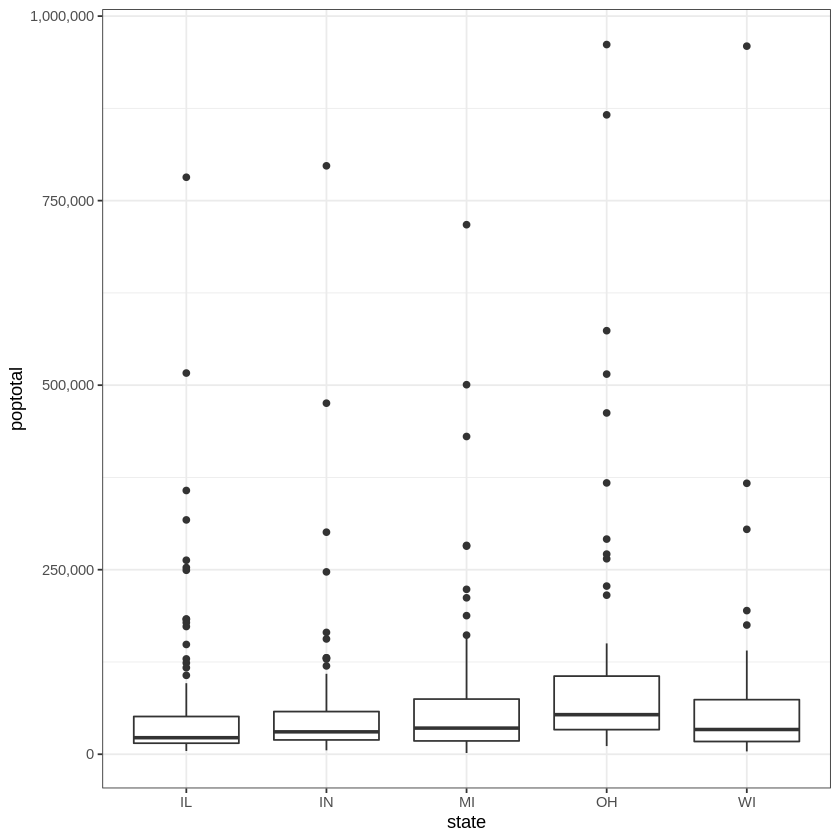

In [46]:
ggplot(midwest[midwest$poptotal < 1000000,], aes(x=state, y=poptotal)) + 
  scale_y_continuous(label=comma) +
  geom_boxplot()

### Empirical CDF (ECDF)

For the empirical CDF (CDF), we just have to take the histogram code and replace `geom_histogram()` with `stat_ecdf()`. 

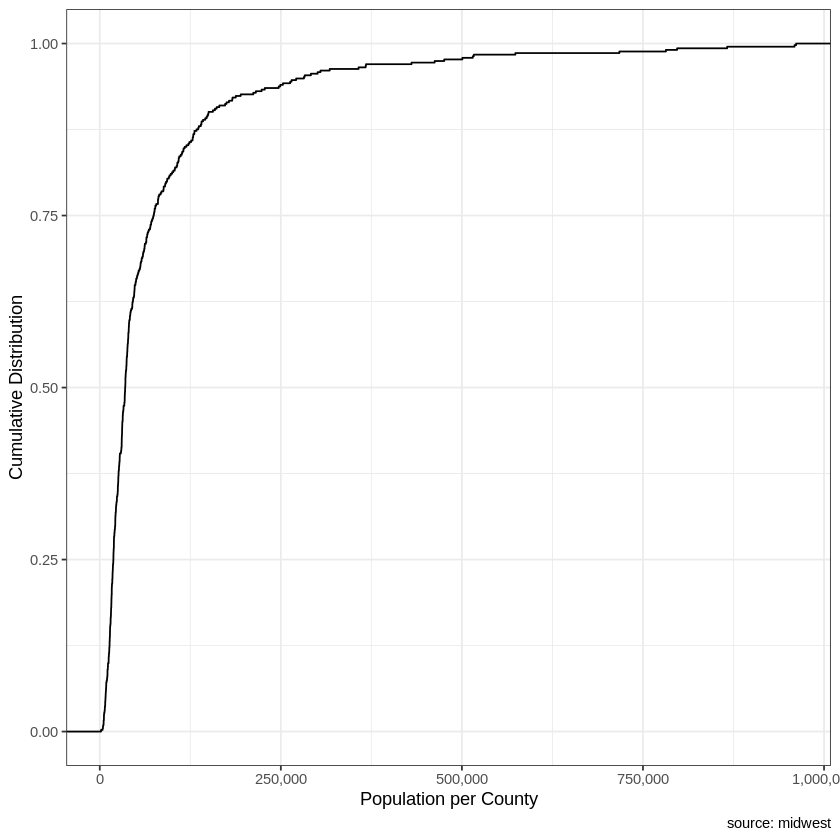

In [47]:
ggplot(midwest[midwest$poptotal < 1000000,], aes(poptotal)) + 
  stat_ecdf() +
  scale_x_continuous(label=comma) +
  labs(x = "Population per County", y = "Cumulative Distribution", caption="source: midwest")

## Output R Datasets to CSV

So that we can use the same data in our Python examples, let's output the `midwest` and `economics` datasets to CSV files that we can load into our Python notebook.

In [48]:
write.csv(midwest,"midwest.csv", row.names = TRUE)

In [49]:
write.csv(economics,"economics.csv", row.names = TRUE)

Now we can refresh our file list and download these files locally (or save them to Google Drive) so that we load them in our Python notebook later.